In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("quikr_car.csv")

In [3]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


# Cleaning the data

In [5]:
bachup=df.copy()

In [6]:
df=df[df['year'].str.isnumeric()]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    object
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 46.0+ KB


In [8]:
df['year']=df['year'].astype(int)

In [9]:
df['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [11]:
df=df[df['Price']!='Ask For Price']

In [15]:
df['Price'].str.replace(',','').astype(int)

AttributeError: Can only use .str accessor with string values!

In [14]:
df['Price']=df['Price'].str.replace(',','').astype(int)

AttributeError: Can only use .str accessor with string values!

In [12]:
df['kms_driven']=df['kms_driven'].str.replace(',','')

In [13]:
df['kms_driven']=df['kms_driven'].str.split(' ').str.get(0)

In [14]:
df['kms_driven']

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
886    132000
888     27000
889     40000
890    Petrol
891    Petrol
Name: kms_driven, Length: 819, dtype: object

In [15]:
df=df[df['kms_driven'].str.isnumeric()]

In [16]:
df['kms_driven']=df['kms_driven'].astype(int)

In [17]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [18]:
df=df[~df['fuel_type'].isna()]

In [19]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

In [20]:
df['name']=df['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [21]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


# reset indexes

In [22]:
df=df.reset_index(drop=True)

In [23]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [24]:
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [25]:
df.corr()['Price']

C:\Users\yasar beg\AppData\Local\Temp\ipykernel_99008\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


year          0.287193
Price         1.000000
kms_driven   -0.120854
Name: Price, dtype: float64

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

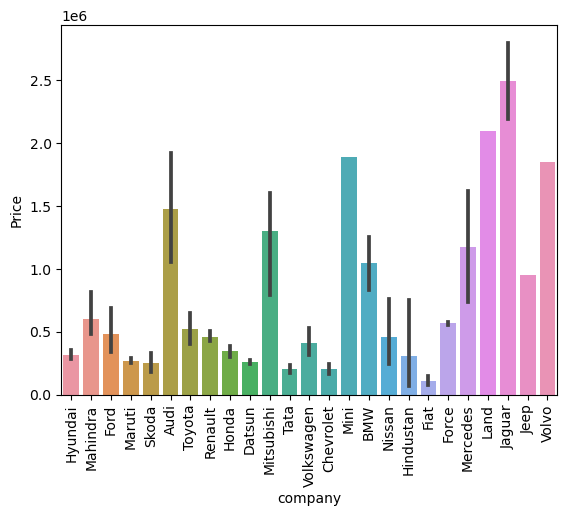

In [27]:
sns.barplot(x=df['company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

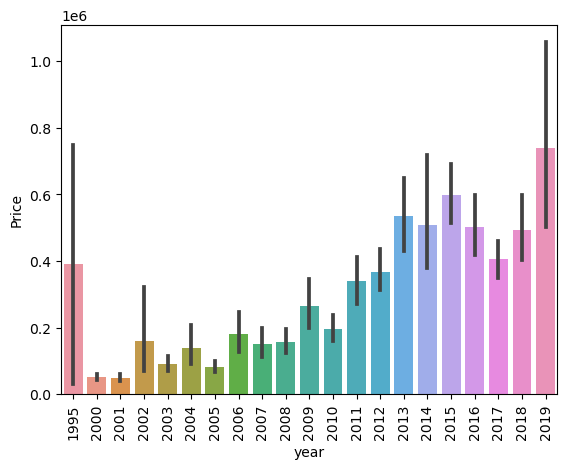

In [28]:
sns.barplot(x=df['year'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

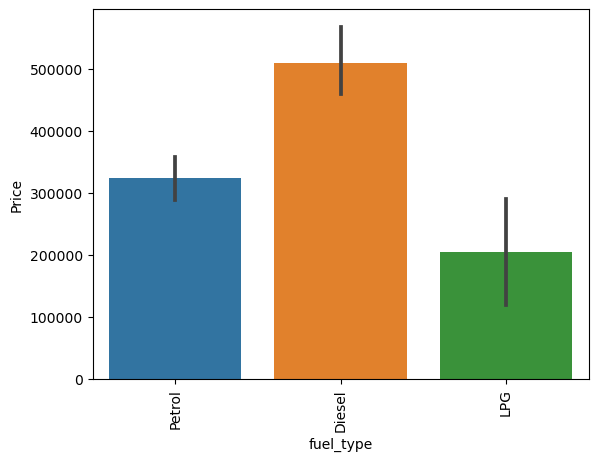

In [29]:
sns.barplot(x=df['fuel_type'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='kms_driven', ylabel='Price'>

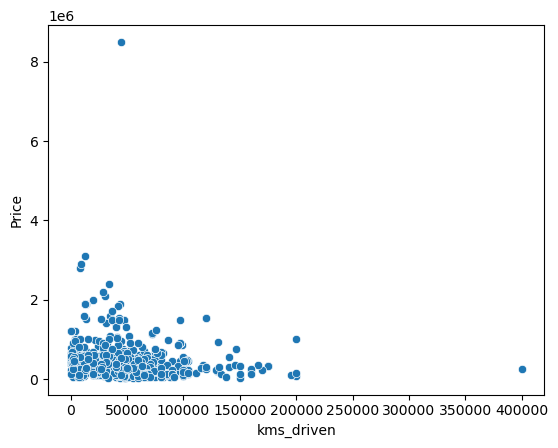

In [30]:
sns.scatterplot(x=df['kms_driven'],y=df['Price'])

In [31]:
df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [32]:
df=df[df['Price']<6e6].reset_index(drop=True)

In [33]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
811,Tata Indica V2,Tata,2009,110000,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [34]:
x=df.drop(columns='Price')
y=df['Price']

In [35]:
x

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
811,Tata Indica V2,Tata,2009,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,132000,Petrol
813,Tata Zest XM,Tata,2018,27000,Diesel


In [36]:
y

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
810    270000
811    110000
812    300000
813    260000
814    390000
Name: Price, Length: 815, dtype: int32

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [39]:
ohe=OneHotEncoder()
ohe.fit(x[['name','company','fuel_type']])

OneHotEncoder()

In [40]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),remainder='passthrough')

In [41]:
lr=LinearRegression()

In [42]:
pipe=make_pipeline(column_trans,lr)

In [43]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [44]:
y_pred=pipe.predict(x_test)

In [45]:
r2_score(y_test,y_pred)

0.612458889049446

In [46]:
score=[]
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    score.append(r2_score(y_test,y_pred))

In [47]:
score

[0.6589755612664917,
 0.4785907352383514,
 0.6206133130187638,
 0.5371013131134159,
 0.8188992272571813,
 0.6635728326928129,
 0.6276367247514185,
 0.6298853016036643,
 0.6720678250288892,
 0.5700525213290304,
 0.6483816946457164,
 0.6243731319329674,
 0.45698723318426604,
 0.6674938761599929,
 0.6487107993791297,
 0.672309538191311,
 0.48784917274409856,
 0.6657839538843597,
 0.6089305430263467,
 0.6040939939842691,
 0.6410914915170072,
 0.6210685853943334,
 0.7363536284648653,
 0.6403447070285103,
 0.5492612327160509,
 0.4986908404250736,
 0.6732770716453351,
 0.7035617007870774,
 0.7254596627062493,
 0.6010333370404545,
 0.6245269751991698,
 0.6287844514094942,
 0.7688821844031649,
 0.7853424906832404,
 0.5622424171296544,
 0.6792647966550431,
 0.5633027316555954,
 0.6169936019987428,
 0.5392937893635652,
 0.7163084832603714,
 0.31576920731740843,
 0.6733785924541373,
 0.5731447528618072,
 0.6687426074029653,
 0.6604138236986205,
 0.6974769530878366,
 0.5258555487510255,
 0.58823482

In [48]:
import numpy as np

In [49]:
np.argmax(score)

433

In [50]:
score[np.argmax(score)]

0.8457158710720103

In [51]:

for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=np.argmax(score))
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    score.append(r2_score(y_test,y_pred))

In [52]:
r2_score(y_test,y_pred)

0.8457158710720103

In [53]:
pipe.predict(pd.DataFrame([['Ford Figo','Ford',2012,41000,'Diesel']],columns=['name','company','year','kms_driven','fuel_type']))

array([342937.67485788])

In [54]:
import pickle

In [55]:
pickle.dump(pipe,open("linearregression_model.pkl","wb"))

In [56]:
pickle.dump(df,open("df.pkl","wb"))

In [57]:
pickle.dump(df.to_dict,open("df_dct.pkl","wb"))

In [58]:
x_train

,name,company,year,kms_driven,fuel_type
481,Maruti Suzuki Wagon,Maruti,2016,35500,Diesel
16,Mahindra Scorpio S10,Mahindra,2016,43000,Diesel
256,Maruti Suzuki Dzire,Maruti,2009,46000,Petrol
73,Honda Amaze,Honda,2015,22000,Petrol
720,Hindustan Motors Ambassador,Hindustan,1995,37000,Petrol
...,...,...,...,...,...
596,Toyota Innova 2.5,Toyota,2011,147000,Diesel
689,Toyota Fortuner 3.0,Toyota,2013,97000,Diesel
648,Maruti Suzuki Ertiga,Maruti,2012,200000,Diesel
607,Volkswagen Polo Trendline,Volkswagen,2015,25000,Diesel
